In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Obfuscated-MalMem2022.csv')
data

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware


In [3]:
pd.set_option("display.max_columns",None)

In [4]:
# Convert Class Benign and Malware to 0 and 1
data["Class"].replace(['Benign','Malware'],[0,1],inplace = True)

In [5]:
#Feature Selection
malmem_data = data.drop(['pslist.nprocs64bit','handles.nport','svcscan.interactive_process_services','Category','psxview.not_in_eprocess_pool',], axis = 1)
malmem_data

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,46,716,887,104,671,125,184,257,53,95,53,0.030372,0.054441,0.030372,5,21,30,1.250000,2,3,2,7,4,9,0.042553,0.0,0.063830,0.042553,0.148936,0.085106,0.191489,138,389,221,26,24,116,121,87,0,8,0
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,51,1011,1030,117,766,148,337,394,77,123,77,0.036167,0.057774,0.036167,12,77,72,1.714286,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.085106,0.042553,0.127660,138,392,222,26,24,118,122,87,0,8,0
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,45,784,1241,100,645,138,369,338,51,89,51,0.026114,0.045571,0.026114,5,6,30,1.250000,0,0,0,4,2,5,0.000000,0.0,0.000000,0.000000,0.100000,0.050000,0.125000,137,395,222,26,27,118,120,88,0,8,0
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,36,654,792,83,567,127,186,242,31,62,31,0.021483,0.042966,0.021483,2,2,12,1.000000,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.125000,0.062500,0.187500,138,395,222,26,27,118,120,88,0,8,0
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,45,1252,942,103,825,135,375,429,102,143,102,0.047820,0.067042,0.047820,12,77,72,2.000000,4,4,4,8,6,10,0.086957,0.0,0.086957,0.086957,0.173913,0.130435,0.217391,138,392,222,26,24,118,124,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,2819,40,668,664,92,596,113,161,230,43,79,43,0.029292,0.053815,0.029292,3,3,18,1.000000,1,1,1,5,3,7,0.026316,0.0,0.026316,0.026316,0.131579,0.078947,0.184211,138,389,221,26,24,116,120,86,0,8,1
58592,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,2394,39,555,624,91,482,102,111,203,43,79,43,0.030958,0.056875,0.030958,3,3,18,1.000000,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.108108,0.054054,0.162162,138,389,221,26,24,116,116,88,0,8,1
58593,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,2816,40,673,661,92,596,113,167,230,43,79,43,0.029292,0.053815,0.029292,3,3,18,1.000000,2,3,2,7,4,9,0.050000,0.0,0.075000,0.050000,0.175000,0.100000,0.225000,138,389,221,26,24,116,120,88,0,8,1
58594,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,2819,40,668,667,92,596,113,161,230,43,79,43,0.029392,0.053999,0.029392,3,3,18,1.000000,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.108108,0.054054,0.162162,138,389,221,26,24,116,120,87,0,8,1


In [6]:
#Normalizing 
normalized_data = (malmem_data - malmem_data.mean())/malmem_data.std()

normalized_data

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,0.624039,0.860512,-0.494953,-0.399305,-0.354189,-0.906964,-0.232097,-0.255196,-0.066753,-0.510776,0.284976,-0.387486,-0.174546,0.163724,-0.130532,-0.356015,-0.735572,-0.759688,-0.417364,-0.230726,-0.417517,-0.301968,-0.077285,-0.302054,-0.130617,-0.156945,-0.133017,-0.176446,0.041441,0.157203,0.039944,0.156517,0.041526,0.156938,0.027138,-0.062642,0.240404,0.025348,0.116411,-0.051912,0.061570,0.194375,-0.518257,-0.204200,0.021983,-0.695213,-0.567282,-0.352673,0.030101,-0.029224,0.01093,-0.999991
1,0.970225,1.613312,0.119793,-0.047165,0.798085,0.073119,0.231446,-0.050184,-0.017224,0.234139,1.253733,1.573858,0.426755,1.492601,0.874429,1.180877,0.324875,1.112582,0.861856,1.075337,0.861804,0.323587,0.252261,0.323323,0.324205,-0.147675,0.321838,-0.007082,-0.626126,-0.491949,-0.622821,-0.492546,-0.626037,-0.476390,-0.712111,-0.062642,-0.713609,-0.705612,-0.922524,-0.825045,-0.975745,0.194375,0.144038,0.298038,0.021983,-0.695213,0.722707,0.001578,0.030101,-0.029224,0.01093,-0.999991
2,-0.241425,-0.268688,2.130260,0.363991,0.367498,0.799752,0.261034,0.264822,0.043958,0.525898,0.091225,0.064620,1.313990,-0.245161,-0.405574,0.512663,0.546667,0.347274,-0.523966,-0.510596,-0.524127,-0.761719,-0.954503,-0.761673,-0.130617,-0.159427,-0.133017,-0.176446,-0.626126,-0.491949,-0.622821,-0.492546,-0.626037,-0.687499,-0.712111,-0.062642,-0.713609,-0.705612,-0.680106,-0.689747,-1.018967,-4.849734,0.806333,0.298038,0.021983,1.266048,0.722707,-0.706924,0.349170,-0.029224,0.01093,-0.999991
3,-1.626167,-0.645088,1.358961,0.149935,-1.109232,0.252253,-0.370174,0.100824,-0.078407,-0.759081,-1.652538,-0.799701,-0.574012,-1.982924,-1.230699,-0.222372,-0.721710,-0.964682,-1.589983,-1.770014,-1.590228,-1.261610,-1.212108,-1.261421,-0.325540,-0.160089,-0.327955,-0.267642,-0.626126,-0.491949,-0.622821,-0.492546,-0.626037,-0.476390,-0.712111,-0.062642,-0.713609,-0.705612,-0.273189,-0.462639,-0.003262,0.194375,0.806333,0.298038,0.021983,1.266048,0.722707,-0.706924,0.349170,-0.029224,0.01093,-0.999991
4,0.104761,0.484112,0.069716,0.302380,0.776859,0.958979,0.320004,0.217619,0.002587,0.324771,0.091225,3.176176,0.056724,0.061503,1.498562,0.312199,0.588254,1.590899,2.194378,2.008239,2.194431,1.581532,1.168817,1.580908,0.324205,-0.147675,0.321838,0.097143,0.709008,0.373587,0.702709,0.372871,0.709090,0.368047,0.798530,-0.062642,0.586061,0.788088,0.522951,0.771642,0.482509,0.194375,0.144038,0.298038,0.021983,-0.695213,0.722707,0.710080,0.030101,-0.029224,0.01093,-0.999991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,-0.760703,0.107712,-0.776680,-0.286286,-1.084974,-0.772817,-0.469622,-0.233387,-0.078407,-0.935378,-0.877532,-0.706620,-1.112239,-1.062932,

LogisticRegression
Confusion Matrix: [[5765   25]
 [  21 5909]]
Accuracy: 0.9960750853242321
Precision: 0.9957869902258173
Recall: 0.9964586846543002
F1-Score: 0.996122724207687
ROC-AUC: 0.9960704476812089


C:\Users\asvik\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


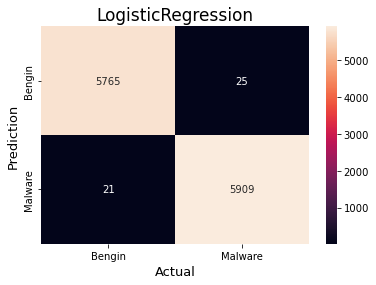


KNeighborsClassifier
Confusion Matrix: [[5786    4]
 [  12 5918]]
Accuracy: 0.9986348122866894
Precision: 0.9993245525160419
Recall: 0.9979763912310287
F1-Score: 0.998650016874789
ROC-AUC: 0.9986427724721636


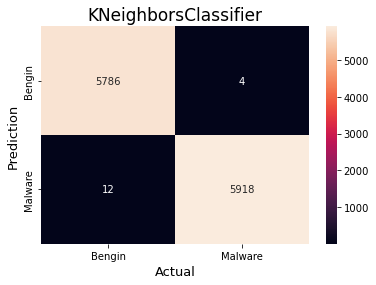


DecisionTreeClassifier
Confusion Matrix: [[5790    0]
 [   1 5929]]
Accuracy: 0.999914675767918
Precision: 1.0
Recall: 0.999831365935919
F1-Score: 0.9999156758579981
ROC-AUC: 0.9999156829679595


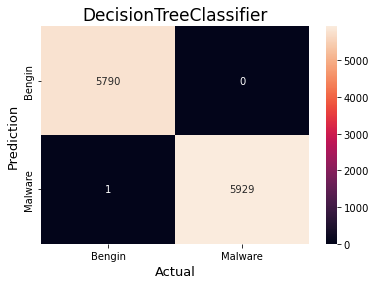


GaussianNB
Confusion Matrix: [[5735   55]
 [  26 5904]]
Accuracy: 0.9930887372013651
Precision: 0.9907702634670247
Recall: 0.9956155143338955
F1-Score: 0.9931869795609387
ROC-AUC: 0.9930581889458769


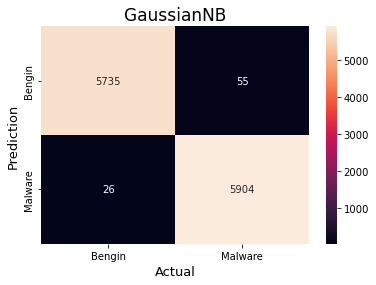


RandomForestClassifier
Confusion Matrix: [[5789    1]
 [   0 5930]]
Accuracy: 0.999914675767918
Precision: 0.9998313943685719
Recall: 1.0
F1-Score: 0.9999156900767221
ROC-AUC: 0.9999136442141623


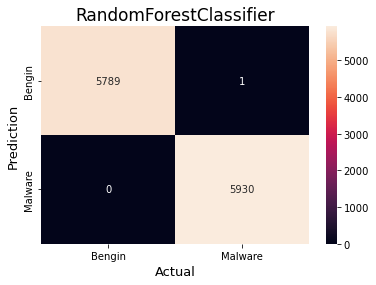


Epoch 1/50
1465/1465 [==============================] - 2s 914us/step - loss: 4.7498 - accuracy: 0.9086
Epoch 2/50
1465/1465 [==============================] - 1s 952us/step - loss: 0.3968 - accuracy: 0.9764
Epoch 3/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.3678 - accuracy: 0.9832
Epoch 4/50
1465/1465 [==============================] - 1s 929us/step - loss: 0.4307 - accuracy: 0.9830
Epoch 5/50
1465/1465 [==============================] - 1s 950us/step - loss: 0.2985 - accuracy: 0.9873
Epoch 6/50
1465/1465 [==============================] - 1s 1ms/step - loss: 0.3198 - accuracy: 0.9872
Epoch 7/50
1465/1465 [==============================] - 1s 800us/step - loss: 0.2406 - accuracy: 0.9887
Epoch 8/50
1465/1465 [==============================] - 1s 990us/step - loss: 0.1517 - accuracy: 0.9910
Epoch 9/50
1465/1465 [==============================] - 1s 820us/step - loss: 0.1853 - accuracy: 0.9891
Epoch 10/50
1465/1465 [==============================] - 1s 782us/s

1465/1465 [==============================] - 2s 1ms/step - loss: 0.0307 - accuracy: 0.9922
Epoch 25/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9892
Epoch 26/50
1465/1465 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.9896
Epoch 27/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9925
Epoch 28/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0319 - accuracy: 0.9914
Epoch 29/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0334 - accuracy: 0.9905
Epoch 30/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0287 - accuracy: 0.9922
Epoch 31/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0274 - accuracy: 0.9923
Epoch 32/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 33/50
1465/1465 [==============================] - 2s 1ms/step - loss: 0.0222 -

1465/1465 [==============================] - 3s 2ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 49/50
1465/1465 [==============================] - 3s 2ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 50/50
367/367 [==============================] - 1s 849us/step - loss: 0.0091 - accuracy: 0.9969
Accuracy RNN: 99.69%
367/367 [==============================] - 0s 781us/step
RNN classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,ConfusionMatrixDisplay,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Recurrent Neural Network
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout



# Generate Malware dataset for classification
X = malmem_data.drop('Class', axis = 1)
y = malmem_data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate 5 different classifiers
classifiers = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(type(clf).__name__)
    print("Confusion Matrix:", cm)
    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", f1)
    print("ROC-AUC:", auc)
   
    
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Bengin', 'Malware'],
            yticklabels=['Bengin', 'Malware'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title(type(clf).__name__,fontsize=17)
    plt.show()
    print()
    
    # Multi layer Perceptrons
model_M = Sequential()
model_M.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_M.add(Dense(32, activation='relu'))
model_M.add(Dense(1, activation='sigmoid'))

# compile the model
model_M.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_M.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# evaluate the model
scores = model_M.evaluate(X_test, y_test)

predict = model_M.predict(X_test)

mlp_predictions = np.round(predict)

print('Accuracy MLP: %.2f%%' % (scores[1]*100))
mlp_report = classification_report(y_test, mlp_predictions)
print('MLP classification report:\n', mlp_report)

# create the DNN model
model_D = Sequential()
model_D.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_D.add(Dropout(0.2))
model_D.add(Dense(64, activation='relu'))
model_D.add(Dropout(0.2))
model_D.add(Dense(32, activation='relu'))
model_D.add(Dense(1, activation='sigmoid'))

# compile the model
model_D.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_D.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# evaluate the model
scores = model_D.evaluate(X_test, y_test)
print('Accuracy DNN: %.2f%%' % (scores[1]*100))
predict = model_D.predict(X_test)

dnn_predictions = np.round(predict)

dnn_report = classification_report(y_test, dnn_predictions)
print('DNN classification report:\n', dnn_report)


# reshape the input data for LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# create the RNN model
model_R = Sequential()
model_R.add(LSTM(128, input_shape=(1, X_train.shape[2]), activation='relu'))
model_R.add(Dense(1, activation='sigmoid'))

# compile the model
model_R.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_R.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# evaluate the model
scores = model_R.evaluate(X_test, y_test)
print('Accuracy RNN: %.2f%%' % (scores[1]*100))

predict = model_R.predict(X_test)

rnn_predictions = np.round(predict)

rnn_report = classification_report(y_test, rnn_predictions)
print('RNN classification report:\n', rnn_report)



Feature ranking:


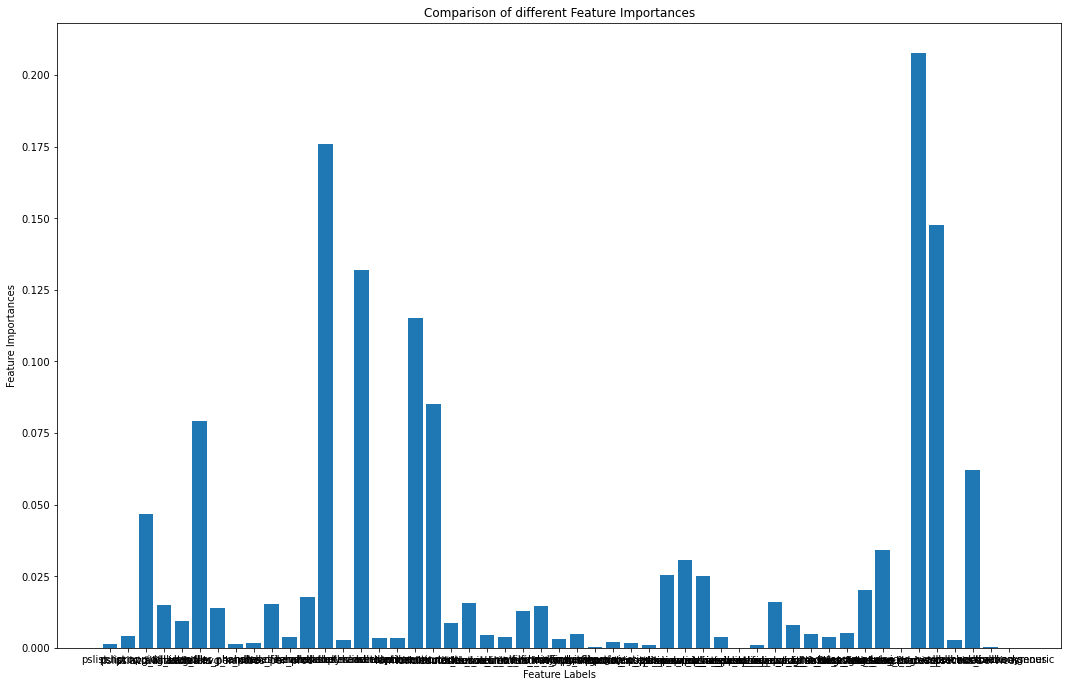

1. feature 46 (22.936089)
2. feature 43 (14.292035)
3. feature 42 (10.864863)
4. feature 16 (7.659469)
5. feature 9 (6.831969)
6. feature 5 (5.836386)
7. feature 17 (5.824566)
8. feature 7 (5.212385)
9. feature 3 (4.790183)
10. feature 4 (3.688553)
11. feature 11 (1.886336)
12. feature 18 (1.727029)
13. feature 8 (1.620908)
14. feature 6 (0.981360)
15. feature 12 (0.931583)
16. feature 14 (0.927067)
17. feature 20 (0.892815)
18. feature 19 (0.765838)
19. feature 27 (0.684477)
20. feature 45 (0.498966)
21. feature 23 (0.283023)
22. feature 33 (0.135141)
23. feature 21 (0.094297)
24. feature 2 (0.088820)
25. feature 15 (0.073938)
26. feature 48 (0.056283)
27. feature 25 (0.052913)
28. feature 13 (0.046515)
29. feature 40 (0.041766)
30. feature 22 (0.041483)
31. feature 1 (0.031379)
32. feature 47 (0.026959)
33. feature 26 (0.025742)
34. feature 24 (0.022246)
35. feature 38 (0.020224)
36. feature 0 (0.016879)
37. feature 31 (0.016570)
38. feature 36 (0.015178)
39. feature 41 (0.014613)
40

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

X = malmem_data.drop('Class', axis = 1)
y = malmem_data['Class']

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest to the data
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

feature_importance_percentages = 100 * (importances / importances.sum())
# Sort feature importances in descending order
indices = np.argsort(feature_importance_percentages)[::-1]

# Print the feature ranking
print("Feature ranking:")

from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.rcParams["figure.figsize"] = (18,11.5)
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance_percentages[indices[f]]))


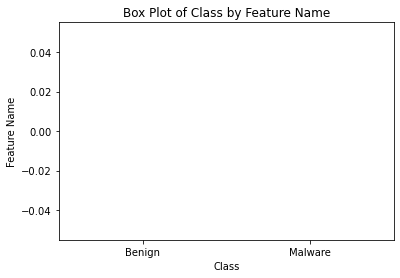

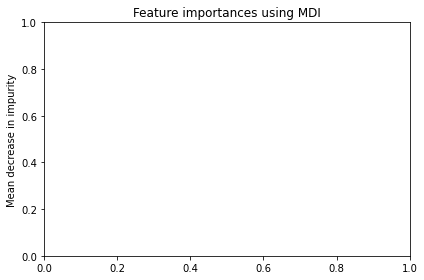

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.boxplot([malmem_data.loc[malmem_data['Class'] == 'Benign', 'Class'],
            malmem_data.loc[malmem_data['Class'] == 'Malware','Class']])
ax.set_title('Box Plot of Class by Feature Name')
ax.set_xlabel('Class')
ax.set_ylabel('Feature Name')
ax.set_xticklabels(['Benign', 'Malware'])

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()